Importo las librerías necesarias:

In [53]:
import pandas as pd#importo pandas
import matplotlib.pyplot as plt#importo el modulo pyplot de matplotlib y le pongo un alias "plt"

Leo los csv con la función "read_csv" de pandas

In [31]:
df_AMD=pd.read_csv('datasets/AMD.csv')
df_Nvidia=pd.read_csv('datasets/Nvidia.csv')
df_Nvidia.tail()#Muestro los últimos 5 elementos del dataframe 

,Date,Open,High,Low,Close,Adj Close,Volume
5801,2023-01-24,188.27,194.95,188.20,192.65,192.62,49620400
5802,2023-01-25,189.13,193.70,185.80,193.23,193.20,44953700
5803,2023-01-26,197.01,201.66,192.78,198.02,197.99,48953500
5804,2023-01-27,194.62,206.28,194.05,203.65,203.62,54214200
5805,2023-01-30,199.50,201.40,191.50,191.62,191.59,48861100


In [3]:
df_AMD.tail()#Muestro los últimos 5 elementos del dataframe

,Date,Open,High,Low,Close,Adj Close,Volume
5801,2023-01-24,73.750000,75.639999,73.419998,74.699997,74.699997,60822600
5802,2023-01-25,72.900002,75.120003,72.089996,74.910004,74.910004,49932600
5803,2023-01-26,76.500000,77.080002,74.279999,75.160004,75.160004,49583900
5804,2023-01-27,73.699997,76.739998,73.489998,75.400002,75.400002,58118600
5805,2023-01-30,74.230003,74.639999,72.400002,72.449997,72.449997,48105200


In [7]:
df_Nvidia.info()#Muestro los últimos 5 elementos del dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5806 entries, 0 to 5805
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5806 non-null   object 
 1   Open       5806 non-null   float64
 2   High       5806 non-null   float64
 3   Low        5806 non-null   float64
 4   Close      5806 non-null   float64
 5   Adj Close  5806 non-null   float64
 6   Volume     5806 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 317.6+ KB


### Proceso de ETL

In [19]:
#Cambio la columna "Date" a formato de fecha para tratarla como tal
df_Nvidia['Date']=df_Nvidia['Date'].astype('datetime64')
df_AMD['Date']=df_AMD['Date'].astype('datetime64')

In [9]:
df_Nvidia.info()#verifico que se haya cambiado de formato

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5806 entries, 0 to 5805
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5806 non-null   datetime64[ns]
 1   Open       5806 non-null   float64       
 2   High       5806 non-null   float64       
 3   Low        5806 non-null   float64       
 4   Close      5806 non-null   float64       
 5   Adj Close  5806 non-null   float64       
 6   Volume     5806 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 317.6 KB


In [20]:
#creo nuevos dataframes teniendo en cuenta la ventana de tiempo a trabajar 
nvidia=df_Nvidia.loc[df_Nvidia["Date"].between('2013-01-1', '2023-01-30')]
amd =df_AMD.loc[df_AMD["Date"].between('2013-01-1', '2023-01-30')]

### Visualizacón de los datos 

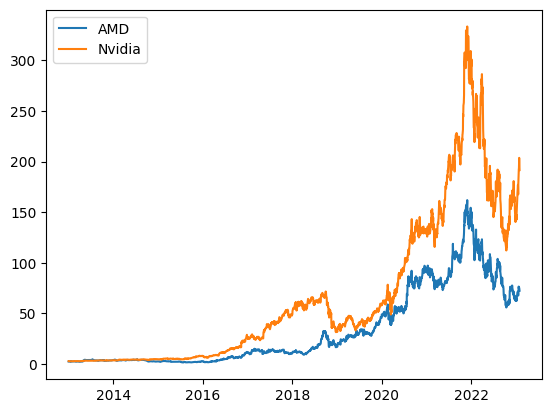

In [28]:

y=amd['Adj Close']
x=amd['Date']
x1=nvidia['Date']
y1=nvidia['Adj Close']

plt.plot(x, y, label='AMD')
plt.plot(x1, y1, label='Nvidia')

plt.legend()

plt.show()



En el grafico anterior podemos ver que las curbas son muy parecidas en cuanto a comportamiento en funcion del tiempo, en lo único que se diferencian a simple vista es en su valor por operación debido a que Nvidia vale mas en el mercado bursátil

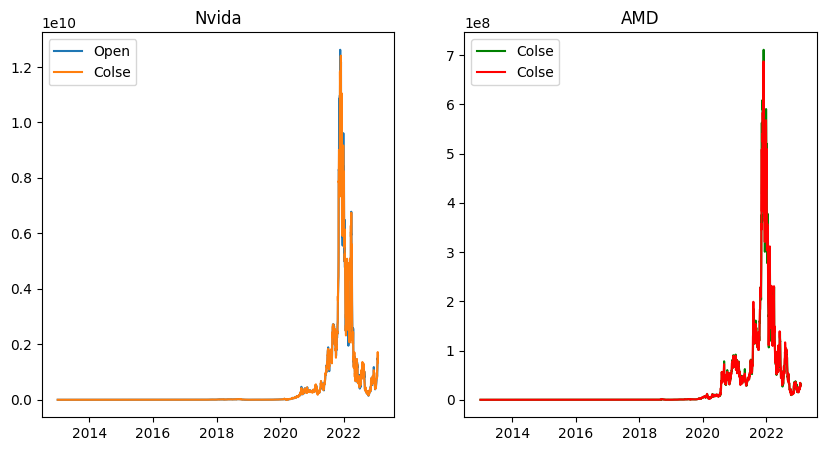

In [30]:
y=nvidia['Open']**4
y1=nvidia['Close']**4
y2=amd['Open']**4
y3=amd['Close']**4
x=nvidia['Date']


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.plot(x, y, label='Open')
ax1.plot(x, y1, label='Colse')
ax2.plot(x, y2, label='Colse', color='green')
ax2.plot(x, y3, label='Colse', color='red')

ax1.legend()
ax2.legend()
ax1.set_title('Nvida')
ax2.set_title('AMD')
plt.show()

En ésta gráfica se puede observar de nuevo que tienen un comportamiento similar en el caso de amd hay mas picos que en el caso de Nvidia, pero hay que tener en cuenta que la diferencia no es muy marcada pese a que hemos elevado nuestra variable a la 4ta potencia

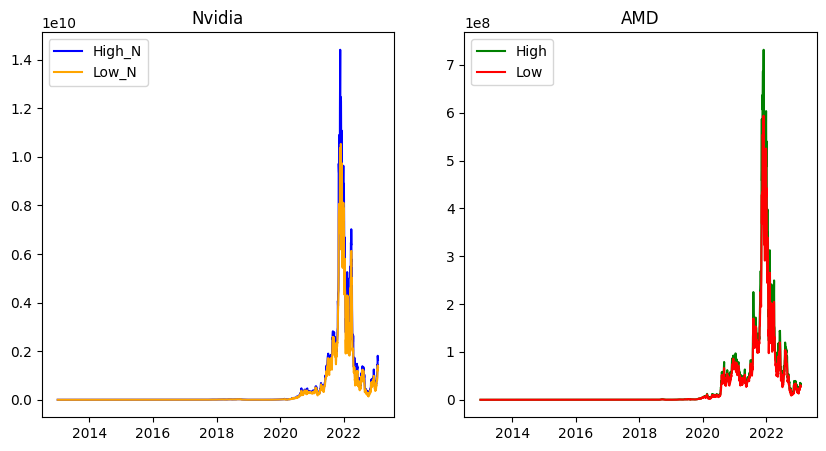

In [33]:
y2=nvidia['High']**4
y3=nvidia['Low']**4
y1=amd['High']**4
y4=amd['Low']**4

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.plot(x, y2, label='High_N', color='Blue')
ax1.plot(x, y3, label='Low_N', color='Orange')

ax2.plot(x, y1, label='High', color='green')
ax2.plot(x, y4, label='Low', color='red')

ax1.set_title('Nvidia')
ax2.set_title('AMD')

ax1.legend()
ax2.legend()

plt.show()

Como se puede observar AMD tiene una aparente menor diferencia entre sus máximos y mínimos, eso puede indicar un menor riezgo de inversión sin embargo también indica un menor porcentaje de ganancias, de igual manera que el enterior gráfico la diferencia no es sustancial si hablamos proporcionalmente a sus propias métricas

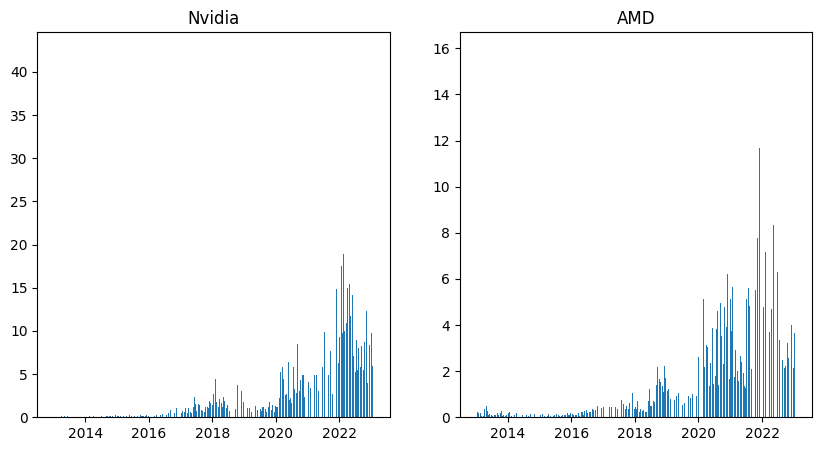

In [34]:
y=nvidia['High']-nvidia['Low']
y1=amd['High']-amd['Low']
x=nvidia['Date']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.bar(x, y)
ax2.bar(x,y1)

ax1.set_title('Nvidia')
ax2.set_title('AMD')

plt.show()

Acá vemos las diferencias entre el maxico y el mínimo, y se ve con mas claridad que AMD tiene mayor diferencias proporcionalmente a sus métricas(porcentualmente)

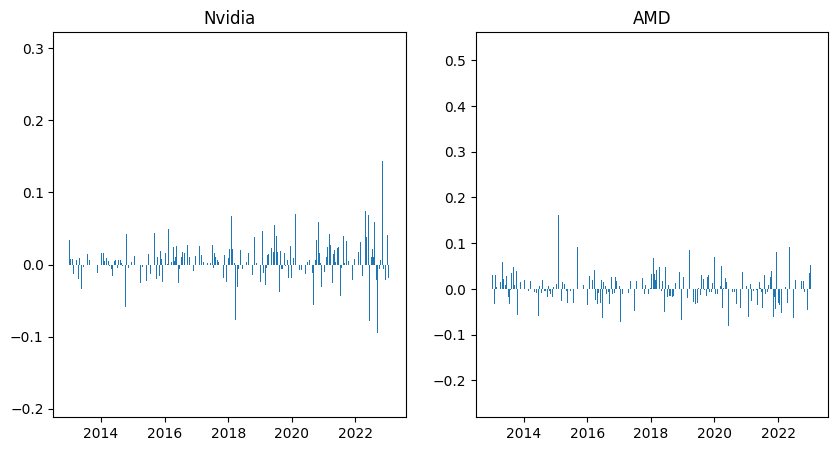

In [35]:
nvidia['ret_diario']=nvidia['Adj Close'].pct_change()
amd['ret_diario']=amd['Adj Close'].pct_change()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

y=nvidia['ret_diario']
y1=amd['ret_diario']
ax1.bar(x, y, label='retorno diario Nvidia')
ax2.bar(x,y1, label='retorno diario AMD')

ax1.set_title('Nvidia')
ax2.set_title('AMD')

plt.show()

En su retorno diario no varían mucho, salvo algunos picos por parte de ambos se mantienen similares

In [36]:
#calculamos media movil
nvidia['Media_movil']=nvidia[['Close']].rolling(window=20).mean()
amd['Media_movil']=amd[['Close']].rolling(window=20).mean()
nvidia

,Date,Open,High,Low,Close,Adj Close,Volume,ret_diario,Media_movil
3269,2013-01-02,3.14,3.18,3.13,3.18,2.94,47883600,NaN,NaN
3270,2013-01-03,3.18,3.22,3.14,3.18,2.94,29888800,0.000000,NaN
3271,2013-01-04,3.19,3.30,3.18,3.29,3.04,52496800,0.034014,NaN
3272,2013-01-07,3.29,3.30,3.17,3.19,2.95,61073200,-0.029605,NaN
3273,2013-01-08,3.20,3.21,3.10,3.12,2.88,46642400,-0.023729,NaN
...,...,...,...,...,...,...,...,...,...
5801,2023-01-24,188.27,194.95,188.20,192.65,192.62,49620400,0.003752,159.9285
5802,2023-01-25,189.13,193.70,185.80,193.23,193.20,44953700,0.003011,161.9870
5803,2023-01-26,197.01,201.66,192.78,198.02,197.99,48953500,0.024793,164.8275
5804,2023-01-27,194.62,206.28,194.05,203.65,203.62,54214200,0.028436,167.9920


In [69]:
#Guardamos la media móvil de los últimos 90 dias para graficarla después
aux=nvidia[nvidia['Media_movil'].notnull()].tail(90)
aux2=amd[amd['Media_movil'].notnull()].tail(90)

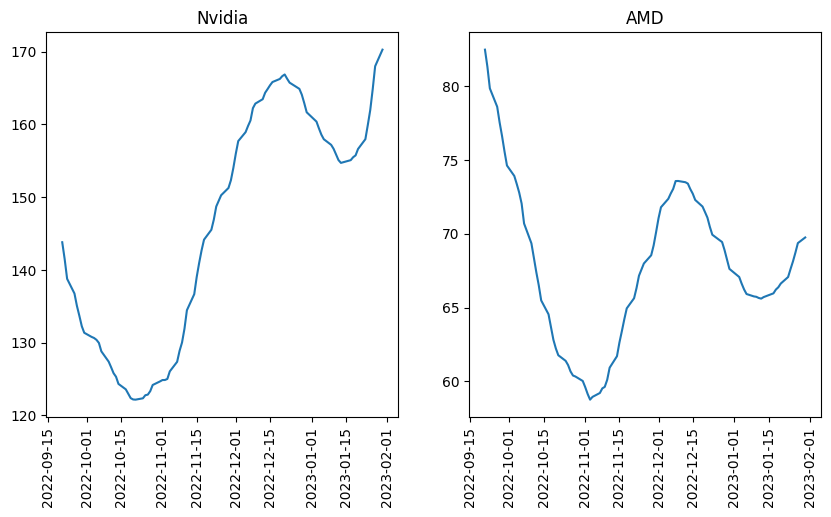

In [70]:

x=aux['Date']
y=aux['Media_movil']
y2=aux2['Media_movil']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.plot(x, y, label='media movil')
ax2.plot(x, y2, label='media movil')

ax1.set_title('Nvidia')
ax1.tick_params(axis='x', rotation=90)
ax2.set_title('AMD')
ax2.tick_params(axis='x', rotation=90)


plt.show()

Comportamientos similares salvo que nvidia muestra una subida en los últimos días y teniendo en cuenta que la curva de amd suele "imitar" de manera exagerada y a corto plazo el comportamiento de Nvidia se recomienda invertir en éste punto en AMD

#### Desviación estandar

In [63]:
#Normalizo los valores del cierre ajustado 
nvidia['Adj_Close_norm'] = (nvidia['Adj Close'] - nvidia['Adj Close'].min()) / (nvidia['Adj Close'].max() - nvidia['Adj Close'].min())
amd['Adj_Close_norm'] = (amd['Adj Close'] - amd['Adj Close'].min()) / (amd['Adj Close'].max() - amd['Adj Close'].min())

#Saco la desviación estandar del cierre ajustado normalizado

desv_est_Nvidia = nvidia['Adj_Close_norm'].std()
desv_est_AMD = amd['Adj_Close_norm'].std()

print(f'Nvidia: {desv_est_Nvidia} | AMD: {desv_est_AMD}')

Nvidia: 0.22363615302715703 | AMD: 0.23803195120716586


El desvio estandar nos indica cuánto varían los datos de un momento a otro, en éste caso varían en promendio 0,22(Nvidia) y 0,23(AMD), es decir éstos números indican en promedio la magnitud de las flucuaciones de cada una de éstas. Esto indica la Volatilidad general de éstas empresas

In [50]:
import math

In [66]:
aux1=nvidia['Adj_Close_norm'].tail(365)
aux2=amd['Adj_Close_norm'].tail(365)
desv_est_Nvidia_D = aux1.std()
desv_est_AMD_D = aux2.std()

In [68]:
dias = math.sqrt(365) #Raíz cuadrada de la cantidad de dias que quiero analizar la volatilidad

#Formula: volatilidad = desvio estandar * raiz cuadrada de la cantidad del número cierres analizados
volatilidad_Nvidia=desv_est_Nvidia_D*dias
volatilidad_AMD=desv_est_AMD_D*dias

print(f'Nvidia: {volatilidad_Nvidia} | AMD: {volatilidad_AMD}')

Nvidia: 3.1590932188523726 | AMD: 3.106301830050158


Finalmente sacamos la Volatilidad anual de cada una de las empresas, analizando el último año, o los últimos 365 cierres, vemos que AMD tiene mayor estavilidad, concretamente 0,05 puntos menos de desviación estandar en estos últimos 365 cierres

In [72]:
#Exporto los df en un csv para hacer la precentación en streamlit
nvidia.to_csv('nvidia_btw_2013-2023.csv')
amd.to_csv('amd_btw_2013-2023.csv')